Unnamed: 0
vp
tour
nbCoup/byTurnW2
nbCoup/byTurnW3
nbCoup/byTurnW4
nbCoup/byTurnW5
nbCoup/byTurnW6
nbCoup/byTurnW7
Unnamed: 0
vp
tour
nbCoup/byTurnW2
nbCoup/byTurnW3
nbCoup/byTurnW4
nbCoup/byTurnW5
nbCoup/byTurnW6
nbCoup/byTurnW7
9
[[[18.0, 21.0, 6.0, 9.0, 12.0, 15.0, 3.0], 3.0], [[0.5421847224743745, 0.5363599177104246, 0.5740962040551288, 0.5719255815294813, 0.5462014701190787, 0.5411644438352933, nan], 3.0], [[13.897361111111108, 14.320496031746032, 13.575000000000001, 13.858333333333333, 13.535416666666666, 13.269583333333333, nan], 3.0], [[nan, nan, 7.8, nan, nan, nan, 9.125], 3.0], [[nan, nan, 7.191666666666666, 6.133333333333333, nan, nan, 8.058333333333334], 3.0], [[nan, nan, 6.6, 5.8125, 5.083333333333333, nan, 7.3812500000000005], 3.0], [[nan, nan, 6.154999999999999, 5.433333333333334, 4.911666666666667, 4.16875, 6.68125], 3.0], [[3.6675000000000004, nan, 5.768263888888889, 5.22, 4.652152777777778, 4.134305555555556, 6.239097222222222], 3.0], [[3.7213095238095235, 3.396021825

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (7,).

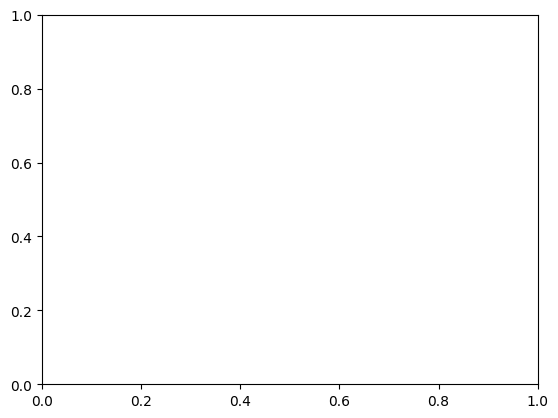

In [12]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
def est(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df

liste_of_df=create_csv_link("csv/csv_UG")

def sommeCSV(liste_of_df):
    lister=[]
    m=0
    for df in liste_of_df :
        
        if(m==0):
            for collone in df :
                lister.append([list(df[collone]),1])
                m=1
                
        else :
            col=0
            for collone in df :
                print(collone)
                for j in range (len(list(df[collone]))) :
                    
                    if (not np.isnan(df[collone][j])) and lister[col][0][j]!=" nan":
                        lister[col][0][j]=float(lister[col][0][j])+float(df[collone][j])
                              
                lister[col][1]=float(lister[col][1])+1
                col=col+1
    print(col)
    new_lister=[]
    print(lister)
    for i in range(len(lister)):
        semi_list={}
        for j in range(len(lister[i][0])):
            if(est(lister[i][0][j])):
                semi_list[float(lister[0][0][j])/3]=(float(lister[i][0][j])/float(lister[i][1]))
        new_lister.append(semi_list)
    print(new_lister)
    return new_lister

def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de vp')
    plt.xlabel('Nombre de vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
print(sommeCSV(liste_of_df))
affichage_graph_vp(sommeCSV(liste_of_df))